In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
import numpy as np


Epoch 1/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1134 - val_loss: 0.0842
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0745 - val_loss: 0.0664
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0615 - val_loss: 0.0568
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0539 - val_loss: 0.0507
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0488 - val_loss: 0.0464
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0450 - val_loss: 0.0430
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0419 - val_loss: 0.0403
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0395 - val_loss: 0.0382
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0377 - val_loss: 0.0366
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


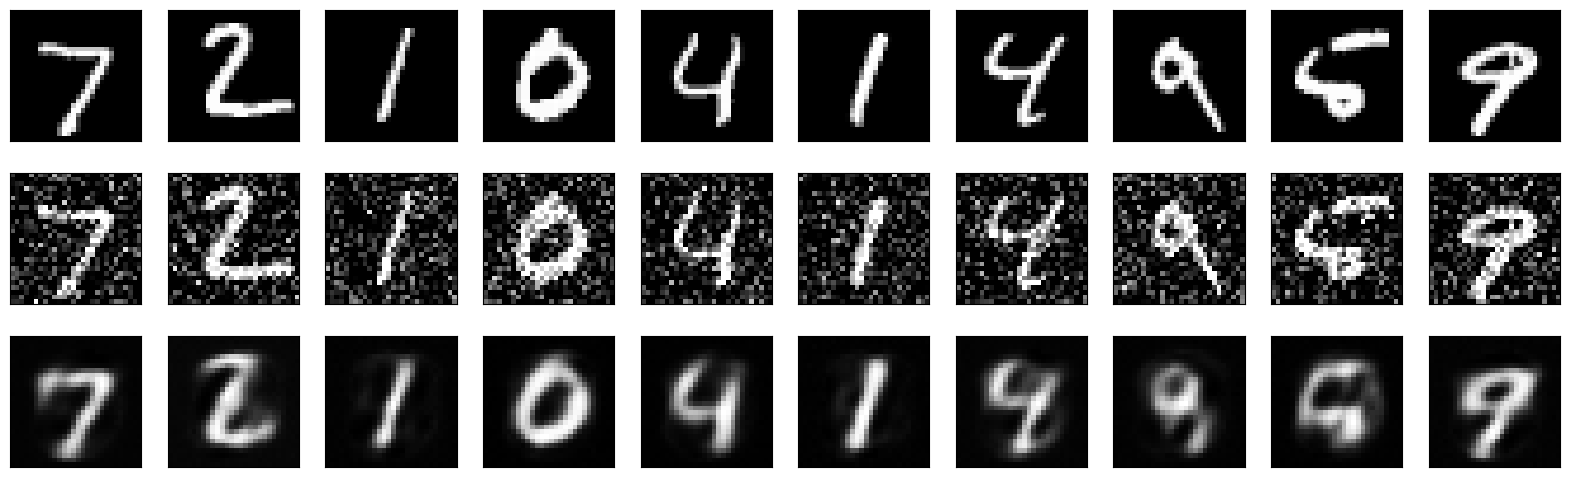

In [5]:

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the input images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the sparse denoising autoencoder architecture
encoding_dim = 200
lambda_ = 0.001
noise_factor = 0.3

input_img = Input(shape=(28*28,))
encoded = Dense(encoding_dim, activation='sigmoid',
                activity_regularizer=regularizers.l1(lambda_))(input_img)
decoded = Dense(28*28, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Add noise to the input data
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy data to the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Use the trained autoencoder for denoising
x_test_denoised = autoencoder.predict(x_test_noisy)

# Display the original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
